# Домашнее задание № 8, Кривоногов Н.В.

1. Можно ли отобрать наиболее значимые признаки из имеющихся с помощью PCA? Ответ объясните.
2. (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd(). Применить к данным на уроке и сравнить ответы.
3. (*) Обучить любую модель классификации (из рассмотренных в курсе) на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

1.

PCA (метод главных компонент, principal component analysis) относится к методам понижения размерности и основан на формировании новых признаков на основе старых. Иными словами, это метод получения основных и самых важных переменных (в форме компонентов) из всего массива набора данных. 

Например, если имеются два признака, сильно коррелирующие друг с другом, то с помощью алгоритма PCA можно найти новый признак и выразить оба этих признака одним новым.

После работы алгоритма получаются простые линейные комбинации изначальных признаков с разными весами - компоненты. Они отличаются тем, что не коррелируют между собой. То есть по итогам работы алгоритма мы получаем новые признаки.

Таким образом можно сделать вывод о том, что отобрать наиболее значимые (изначальные) признаки не получится. 

2. 

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# загрузжаю "игрушечный" датасет из sklearn (классификация цветов Ириса): 

iris = datasets.load_iris()
X = iris.data

In [3]:
# отмасштабирую выборку: 

X_ = X.astype(float)

rows, cols = X_.shape


# центрирую данные - вычитанием из каждого значения среднего по строке: 

means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

        
# делю каждое значение на стандартное отклонение: 

std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [4]:
# использую функцию numpy.linalg.svd(): 

U, s, W = np.linalg.svd(X_)

display(s, W)

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [5]:
# строки матрицы W являются собственными векторами, соответствующими сингулярным числам из множества s. 
# возьму для преобразования только первые строки: 

Z = X_ @ W[:2,:].T

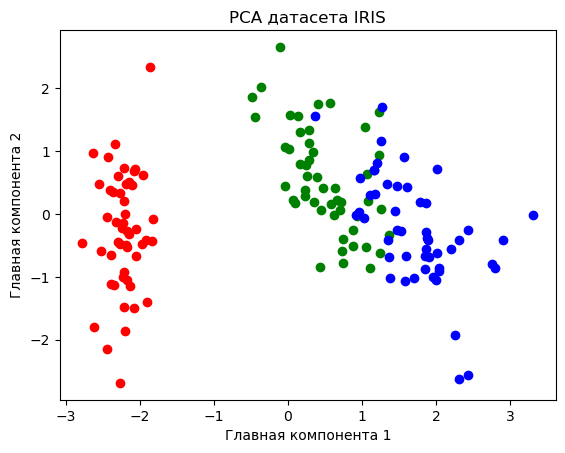

In [6]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Как видно, снижение размерности данных через сингулярное разложение матриц абсолютно идентично снижению размерности через собственные вектора и собственные значения матрицы ковариации (которое рассматривалось на уроке).